# Prediction the Height of a Person based on Parents Height

Sir Francis Galton (1822-1911) was an English mathematician.  In 1886, he published a paper entitled "Regression Towards Mediocrity in Hereditary Stature".  In this paper, he investigated the relationship between the heights of fathers and sons.  

He found that tall fathers tended to have tall sons, but that the sons were not as tall as their fathers.

Likewise, short fathers tended to have short sons, but the sons were not as short as their
fathers.  

Galton called this phenomenon "regression toward mediocrity", which is the origin of the term "regression".  

Galton's paper is available at
http://galton.org/essays/1880-1889/galton-1886-jaigi-regression-stature.pdf

Galton's data is available at http://www.randomservices.org/random/data/Galton.html

The data is in a file called "Galton.txt".  The data is in tab-separated-value format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

In [2]:
# Read the data into a Pandas DataFrame
height_data = pd.read_csv('Galton.txt', sep='\t')

# Convert the Gender column to a numeric variable (0 or 1)
height_data['GenderValue'] = height_data['Gender']=='M'
height_data.head()

# Create a "normalized" version of the data
height_data['Father_Normalized'] = (height_data['Father'] - height_data['Father'].mean()) / height_data['Father'].std()
height_data['Mother_Normalized'] = (height_data['Mother'] - height_data['Mother'].mean()) / height_data['Mother'].std()
height_data['Gender_Normalized'] = (height_data['GenderValue'] - height_data['GenderValue'].mean()) / height_data['GenderValue'].std()

Text(0, 0.5, 'Height')

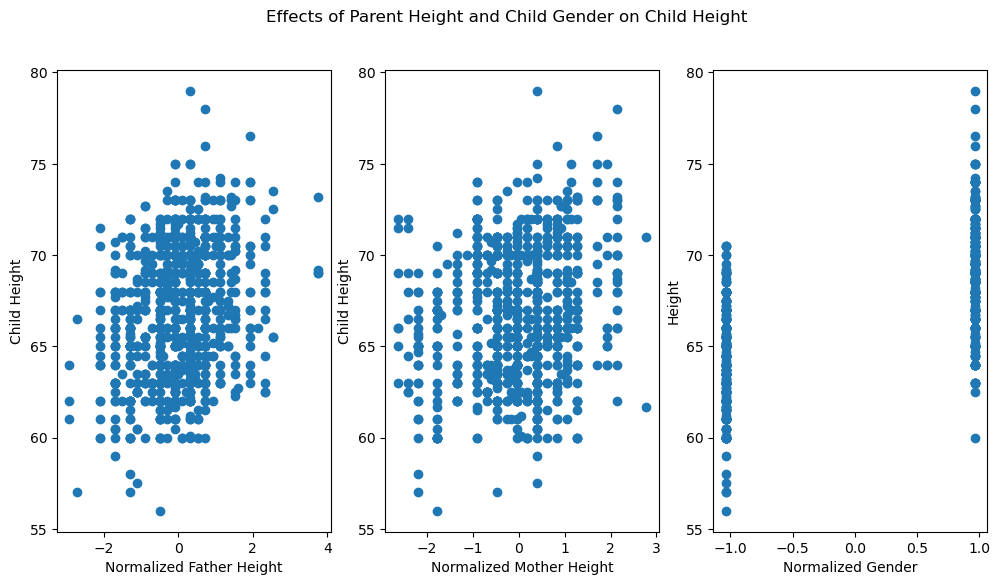

In [3]:
# Look at the data!  Create plots of Height vs. each relevant variable
fig, ax = plt.subplots(1, 3, figsize=(12,6))
fig.suptitle("Effects of Parent Height and Child Gender on Child Height")
ax[0].plot(height_data['Father_Normalized'], height_data['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[0].set_xlabel('Normalized Father Height')
ax[0].set_ylabel('Child Height')

ax[1].plot(height_data['Mother_Normalized'], height_data['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[1].set_xlabel('Normalized Mother Height')
ax[1].set_ylabel('Child Height')

ax[2].plot(height_data['Gender_Normalized'], height_data['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[2].set_xlabel('Normalized Gender')
ax[2].set_ylabel('Height')

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     529.0
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          1.33e-197
Time:                        16:54:19   Log-Likelihood:                -1961.4
No. Observations:                 898   AIC:                             3931.
Df Residuals:                     894   BIC:                             3950.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            66.7607      0.07

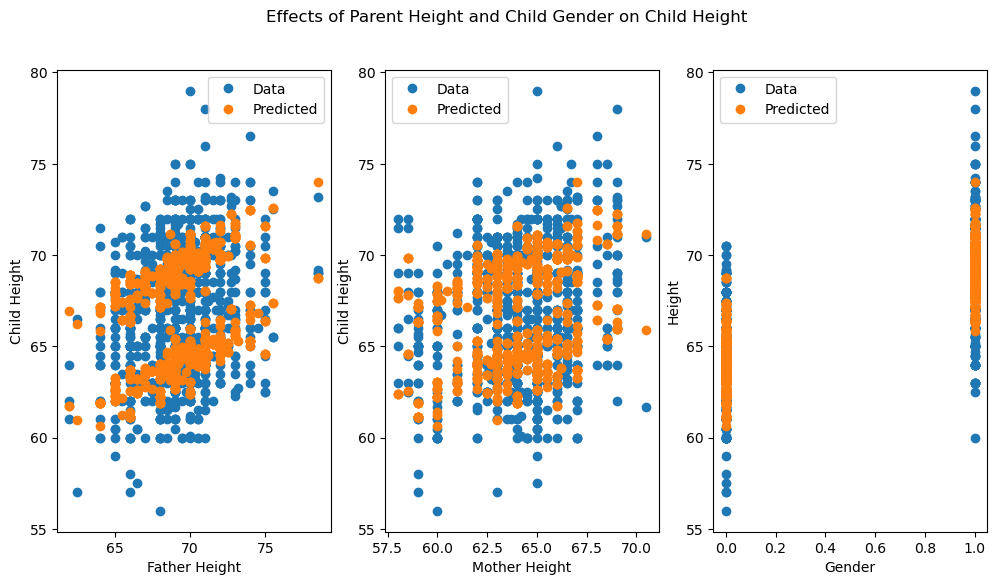

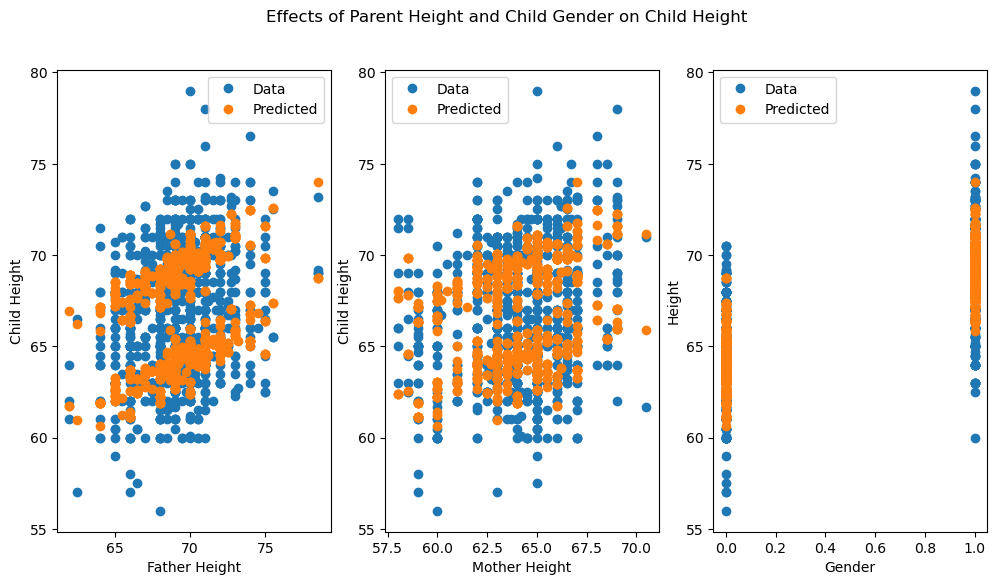

In [4]:
# Fit a linear regression model - Height = a0 + a1*Father_Height + a2*Mother_Height + a3*Gender
model = smf.ols('Height ~ Father_Normalized + Mother_Normalized + Gender_Normalized', data=height_data)
model = model.fit()

# View model summary
print(model.summary())

# Predict values
height_pred = model.predict()

# Add this prediction to the DataFrame
height_data['Height_Predicted'] = height_pred
# Add the DIFFERENCE between Height data and prediction to the DataFrame
height_data['Height_Residual'] = height_data['Height'] - height_pred
print(height_data.head())

# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(1, 3, figsize=(12,6))
fig.suptitle("Effects of Parent Height and Child Gender on Child Height")
ax[0].plot(height_data['Father'], height_data['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[0].plot(height_data['Father'], height_data['Height_Predicted'], 'o', label = "Predicted")           # scatter plot showing actual data
ax[0].legend()
ax[0].set_xlabel('Father Height')
ax[0].set_ylabel('Child Height')

ax[1].plot(height_data['Mother'], height_data['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[1].plot(height_data['Mother'], height_data['Height_Predicted'], 'o', label = "Predicted")           # scatter plot showing actual data
ax[1].legend()
ax[1].set_xlabel('Mother Height')
ax[1].set_ylabel('Child Height')

ax[2].plot(height_data['GenderValue'], height_data['Height'], 'o', label = "Data")           # scatter plot showing actual data
ax[2].plot(height_data['GenderValue'], height_data['Height_Predicted'], 'o', label = "Predicted")           # scatter plot showing actual data
ax[2].legend()
ax[2].set_xlabel('Gender')
ax[2].set_ylabel('Height')

fig

,0,1
Intercept,66.619596,66.901785
Father_Normalized,0.861269,1.144470
Mother_Normalized,0.600059,0.883336
Gender_Normalized,2.471466,2.754077


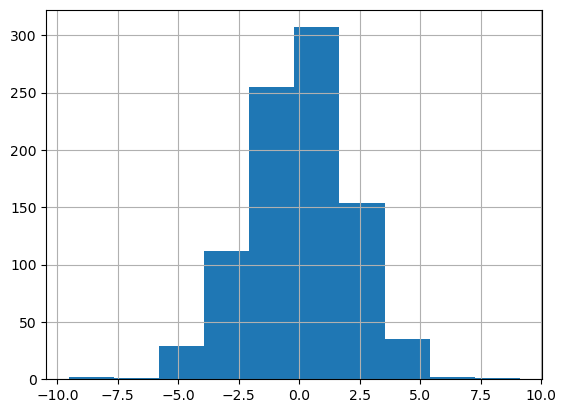

In [5]:
height_data['Height_Residual'].hist()
model.conf_int()

In [6]:
print(height_data.columns)

Index(['Family', 'Father', 'Mother', 'Gender', 'Height', 'Kids', 'GenderValue',
       'Father_Normalized', 'Mother_Normalized', 'Gender_Normalized',
       'Height_Predicted', 'Height_Residual'],
      dtype='object')


In [7]:
height_data_new = pd.DataFrame({'Family': [1, 2, 2], 'Father': [72.5, 68.0, 68.0], 
                           'Mother': [63.0, 70.0, 70.0], 'Gender': ['M', 'F', 'M'],
                           'Height': [74.0,62.5,71.0], 'Kids': [1,1,2],
                           'GenderValue': [1, 0, 1], 'Height_Predicted': [0,0,0],
                           'Height_Residual': [0,0,0]})

height_data_new['Father_Normalized'] = (height_data_new['Father'] - height_data['Father'].mean()) / height_data['Father'].std()
height_data_new['Mother_Normalized'] = (height_data_new['Mother'] - height_data['Mother'].mean()) / height_data['Mother'].std()
height_data_new['Gender_Normalized'] = (height_data_new['GenderValue'] - height_data['GenderValue'].mean()) / height_data['GenderValue'].std()

height_data_new['Height_Predicted'] = model.predict(height_data_new)
height_data_new['Height_Residual'] = height_data_new['Height'] - height_data_new['Height_Predicted']

In [8]:
print(height_data_new)

   Family  Father  Mother Gender  Height  Kids  GenderValue  Height_Predicted  \
0       1    72.5    63.0      M    74.0     1            1         70.258312   
1       2    68.0    70.0      F    62.5     1            0         65.455925   
2       2    68.0    70.0      M    71.0     2            1         70.681877   

   Height_Residual  Father_Normalized  Mother_Normalized  Gender_Normalized  
0         3.741688           1.322596          -0.470047           0.964441  
1        -2.955925          -0.499078           2.564164          -1.035716  
2         0.318123          -0.499078           2.564164           0.964441  


In [9]:
predictions = model.get_prediction(height_data_new)
print(predictions.summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  70.258312  0.144515      69.974683      70.541940     66.020684   
1  65.455925  0.215500      65.032980      65.878870     61.206698   
2  70.681877  0.217356      70.255290      71.108463     66.432286   

   obs_ci_upper  
0     74.495940  
1     69.705152  
2     74.931467  
